In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras import backend as K
from sklearn.preprocessing import LabelEncoder
from skimage.io import imread, imshow
from skimage.transform import resize
from glob import glob
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.callbacks import ModelCheckpoint

2022-11-05 16:19:24.508917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 16:19:25.287010: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-05 16:19:25.287070: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-05 16:19:25.401762: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-05 16:19:27.604158: W tensorflow/stream_executor/platform/de

In [2]:
file_path=glob("IDC_regular_ps50_idx5/*/*")
class0=[]
class1=[]
for i in file_path:

    h=glob(i+"/"+"*")
    if i.endswith("0"):
        for j in h:
            class0.append(j)
    else:
        for j in h:
            class1.append(j)

    


In [3]:
sample1=random.sample(class0,18786)
sample2=random.sample(class1,18786)

In [4]:
len(sample1)

18786

In [5]:
def feature_extract(path,class_name):
    val=[]
    for i in path:
        image_data=imread(i)
        image_size=resize(image_data,(50,50))
        val.append([image_size,class_name])
    
    return val



In [6]:
non_breast_cancer=feature_extract(sample1,"non_breast_cancer")

In [7]:
breast_cancer=feature_extract(sample2,"breast_cancer")

In [8]:
combined_data=np.concatenate((non_breast_cancer,breast_cancer))
random.seed(42)
random.shuffle(combined_data)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [9]:
x=[]
y=[]
for features,class_value in combined_data:
    x.append(features)
    y.append(class_value)

In [10]:
x=np.array(x)


In [11]:
g=0
g1=0
for i in y:
    if i!="non_breast_cancer":
        g+=1
    else:
        g1+=1
print(g,g)

5792 5792


In [12]:
'''
samples,nx,ny,nz=x.shape
x=x.reshape(samples,nx*ny*nz)
'''


'\nsamples,nx,ny,nz=x.shape\nx=x.reshape(samples,nx*ny*nz)\n'

In [13]:
'''
y1=[]
for i in y:
    if i=="breast_cancer":
        y1.append([0,1])
    else:
        y1.append([1,0])
y1=np.array(y1)
y1[0]
'''
lb=LabelEncoder()
y1=to_categorical(lb.fit_transform(y))
y1

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [14]:
#from sklearn.preprocessing import MinMaxScaler
#scaling = MinMaxScaler(feature_range=(-1,1)).fit(x)
#x = scaling.transform(x)


In [15]:
x.shape

(37572, 50, 50, 3)

In [16]:
#svm=SVC(C=1.0,kernel="poly",gamma=1.0,degree=1)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.26,random_state=42)

In [18]:
#svm.fit(x_train,y_train)

In [19]:
model=Sequential()
model.add(Conv2D(32,kernel_size=3,activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(2,kernel_regularizer=l2(0.01),activation = "softmax"))
model.compile(optimizer="Adam",loss="hinge", metrics = ["accuracy"])


2022-11-05 16:21:37.467047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-05 16:21:37.467091: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-05 16:21:37.467125: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hrithik-Lenovo-ideapad-320-15ISK): /proc/driver/nvidia/version does not exist
2022-11-05 16:21:37.468731: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 2)                 1

In [21]:
#x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.22,random_state=42)

In [22]:
num_epochs =10
num_batch_size =90

checkpointer = ModelCheckpoint(filepath='breast_cancer_svm_classification.hdf5',
    verbose=1,
    save_best_only=True)


history= model.fit(x_train, y_train,batch_size=num_batch_size,epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)



2022-11-05 16:21:39.365385: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 834090000 exceeds 10% of free system memory.


Epoch 1/10
309/309 [==============================] - ETA: 0s - loss: 0.6623 - accuracy: 0.8451

2022-11-05 16:22:36.890342: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 293070000 exceeds 10% of free system memory.



Epoch 00001: val_loss improved from inf to 0.65857, saving model to breast_cancer_svm_classification.hdf5
309/309 [==============================] - 62s 195ms/step - loss: 0.6623 - accuracy: 0.8451 - val_loss: 0.6586 - val_accuracy: 0.8419
Epoch 2/10
309/309 [==============================] - ETA: 0s - loss: 0.6529 - accuracy: 0.8472
Epoch 00002: val_loss improved from 0.65857 to 0.65834, saving model to breast_cancer_svm_classification.hdf5
309/309 [==============================] - 59s 190ms/step - loss: 0.6529 - accuracy: 0.8472 - val_loss: 0.6583 - val_accuracy: 0.8419
Epoch 3/10
309/309 [==============================] - ETA: 0s - loss: 0.6528 - accuracy: 0.8472
Epoch 00003: val_loss improved from 0.65834 to 0.65806, saving model to breast_cancer_svm_classification.hdf5
309/309 [==============================] - 59s 190ms/step - loss: 0.6528 - accuracy: 0.8472 - val_loss: 0.6581 - val_accuracy: 0.8419
Epoch 4/10
309/309 [==============================] - ETA: 0s - loss: 0.6529 - 

In [23]:
#classifier=SVC(C=1.0,kernel="poly",gamma=1.0,degree=5)

In [24]:
#classifier.fit(x_train,y_train)
model=load_model("breast_cancer_svm_classification.hdf5")

In [25]:
model.evaluate(x_test,y_test)

2022-11-05 16:31:19.180284: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 293070000 exceeds 10% of free system memory.


306/306 [==============================] - 6s 18ms/step - loss: 0.6581 - accuracy: 0.8419


[0.6580514311790466, 0.8419490456581116]

In [26]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
read_img=imread("carci.png")
read_img=resize(read_img,(50,50))

explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         read_img, 
         model.predict
)
plt.imshow(read_img)
image, mask = explanation.get_image_and_mask(
         model.predict(
              read_img.reshape(-1,50,50,3)
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))



FileNotFoundError: No such file: '/home/hrithik/Desktop/carcinoma-main/carci.png'

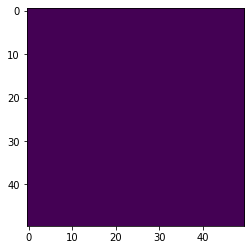

In [ ]:
plt.imshow(mask)

In [ ]:
#shap
import shap
shap.initjs()
class_labels=["non-carcinoma","carcinoma"]

In [ ]:
masker = shap.maskers.Image("blur(28,28)", x_train[1].shape)

explainer = shap.Explainer(model, masker, output_names=class_labels)

explainer

In [ ]:
shap_values = explainer(x_test[4:8], outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape


(4, 50, 50, 3, 2)

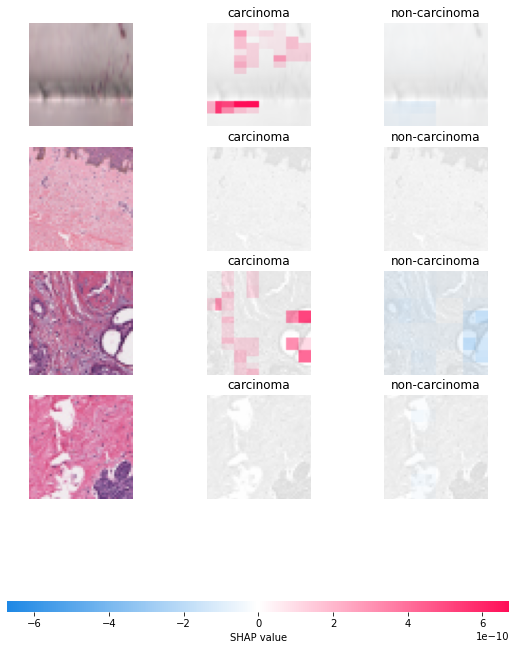

In [ ]:
shap.image_plot(shap_values)

In [ ]:
print(model.predict(x_test))

2022-08-26 22:55:12.425422: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 293070000 exceeds 10% of free system memory.


[[-1.6861491e+00  1.7093453e+00]
 [-1.6684413e+00  1.7041099e+00]
 [ 2.2661448e-02  1.3661385e-04]
 ...
 [-6.3979864e-01  6.6201234e-01]
 [-1.0219839e+00  1.0547683e+00]
 [-1.0092521e+00  1.0367010e+00]]


In [ ]:
from sklearn.metrics import precision_recall_curve,f1_score,recall_score,classification_report, precision_score ,confusion_matrix
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print('test loss:{} \ntest acc:{}'.format(test_accuracy[0],test_accuracy[1]))
rounded_predictions = model.predict_classes(x_test)
print(rounded_predictions)
print(x_test.shape,y_test.shape)
rounded_labels=np.argmax(y_test,axis=1)
print(rounded_labels)
#print(rounded_labels.shape)
#print(rounded_predictions.shape)
rounded_predictions=rounded_predictions
#rounded_predictions=np.argmax(rounded_predictions)
#print(rounded_predictions.shape)
cm = confusion_matrix(rounded_labels, rounded_predictions)
#cm1=classification_report(rounded_labels,rounded_predictions)
print("The confusion matrix is :",cm)
#print(cm1)
print("precision value : ",precision_score(rounded_labels,rounded_predictions))
print("recall_score : ",recall_score(rounded_labels,rounded_predictions))
print("f1-score : ",f1_score(rounded_labels,rounded_predictions))

2022-08-26 22:55:18.653657: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 293070000 exceeds 10% of free system memory.


test loss:0.2633665204048157 
test acc:0.8868870735168457


`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


[1 1 0 ... 1 1 1]
(9769, 50, 50, 3) (9769, 2)
[1 1 1 ... 1 1 1]
The confusion matrix is : [[ 726  818]
 [ 287 7938]]
precision value :  0.9065783462768388
recall_score :  0.9651063829787234
f1-score :  0.9349272716565573


In [ ]:

from sklearn.metrics import roc_curve,roc_auc_score
y_preb=model.predict_proba(x_test)

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


In [ ]:

auc_keras =roc_auc_score(y_test,y_preb)
auc_keras

0.8857985810353246

In [ ]:
y1=y_test.flatten()
y2=y_preb.flatten()

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(y1,y2)

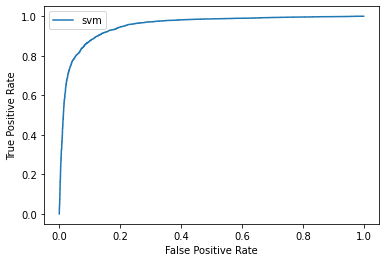

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='-', label='svm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
shap_explainer = shap.KernelExplainer(model.predict,x_train[:10])
shap_values = shap_explainer.shap_values(x_test[:10])

In [ ]:
p=[]
for i in range(50):
    p.append("pixel"+i+1)
    

In [ ]:
shap.summary_plot(shap_values,x_test,class_names=class_labels, feature_names =feature_list)